In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dask.dataframe as ddf
from pandas import Series, DataFrame
%matplotlib inline
import seaborn as sn

In [2]:
import geopandas as gpd
import pandas as pd

### Load the 50 citis data

### Heatwave Count

In [3]:
heatwave_count = pd.read_csv(r"/global/cfs/cdirs/m1532/Projects_MVP/geospatial/climate_heatwave/city_heatwave/city_heatwave/min_apparent_temp/city_heatwave_count_monthly_1961_2021.csv").drop(columns={'Unnamed: 0'})
heatwave_count

,year,month,city_name,heatwave_count
0,1961,1,Albany,0
1,1961,1,Albuquerque,0
2,1961,1,Allentown,0
3,1961,1,Atlanta,0
4,1961,1,Austin,0
...,...,...,...,...
36088,2021,12,Seattle,0
36089,2021,12,St. Louis,0
36090,2021,12,Tampa,0
36091,2021,12,Tucson,0


In [4]:
heatwave_count['heatwave_count'].describe()

count    36093.000000
mean         0.218020
std          0.662717
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: heatwave_count, dtype: float64

In [5]:
heatwave_count = heatwave_count.drop('month', axis = 1)
heatwave_count = heatwave_count.groupby(['year', 'city_name']).sum()
heatwave_count = heatwave_count.reset_index()
heatwave_count.head()

,year,city_name,heatwave_count
0,1961,Albany,5
1,1961,Albuquerque,2
2,1961,Allentown,2
3,1961,Atlanta,0
4,1961,Austin,1


In [6]:
def printCityNumbers(df, years):
    city_numbers = []
    for year in years:
        dict_year = {}
        df_year = df[df['year'] == year]
        numbers = len(df_year['city_name'].unique())
        dict_year[year] = numbers
        city_numbers.append(dict_year)
    return city_numbers

In [7]:
len(heatwave_count['city_name'].unique())

50

In [8]:
years = [year for year in range(1961, 2022)]

In [9]:
city_numbers_Count = printCityNumbers(heatwave_count, years)
city_numbers_Count

[{1961: 50},
 {1962: 50},
 {1963: 50},
 {1964: 50},
 {1965: 50},
 {1966: 50},
 {1967: 50},
 {1968: 50},
 {1969: 50},
 {1970: 50},
 {1971: 50},
 {1972: 50},
 {1973: 50},
 {1974: 50},
 {1975: 50},
 {1976: 50},
 {1977: 50},
 {1978: 50},
 {1979: 50},
 {1980: 50},
 {1981: 50},
 {1982: 50},
 {1983: 50},
 {1984: 50},
 {1985: 50},
 {1986: 50},
 {1987: 50},
 {1988: 50},
 {1989: 50},
 {1990: 50},
 {1991: 50},
 {1992: 50},
 {1993: 50},
 {1994: 50},
 {1995: 50},
 {1996: 50},
 {1997: 50},
 {1998: 50},
 {1999: 50},
 {2000: 50},
 {2001: 50},
 {2002: 50},
 {2003: 50},
 {2004: 50},
 {2005: 50},
 {2006: 50},
 {2007: 50},
 {2008: 50},
 {2009: 50},
 {2010: 50},
 {2011: 50},
 {2012: 50},
 {2013: 50},
 {2014: 50},
 {2015: 50},
 {2016: 50},
 {2017: 50},
 {2018: 50},
 {2019: 50},
 {2020: 50},
 {2021: 50}]

In [10]:
def findDecade(year):
    if year >= 1961 and year <= 1970:
        return '1960s'
    elif year >= 1971 and year <= 1980:
        return '1970s'
    elif year >= 1981 and year <= 1990:
        return '1980s'
    elif year >= 1991 and year <= 2000:
        return '1990s'
    elif year >= 2001 and year <= 2010:
        return '2000s'
    elif year >= 2011 and year <= 2020:
        return '2010s'
    else:
        return '2020s'

In [11]:
heatwave_count['decade'] = heatwave_count['year'].apply(findDecade)
heatwave_count

,year,city_name,heatwave_count,decade
0,1961,Albany,5,1960s
1,1961,Albuquerque,2,1960s
2,1961,Allentown,2,1960s
3,1961,Atlanta,0,1960s
4,1961,Austin,1,1960s
...,...,...,...,...
3045,2021,Seattle,4,2020s
3046,2021,St. Louis,2,2020s
3047,2021,Tampa,9,2020s
3048,2021,Tucson,1,2020s


In [12]:
len(heatwave_count['city_name'].unique())

50

In [13]:
heatwave_count.columns

Index(['year', 'city_name', 'heatwave_count', 'decade'], dtype='object')

In [42]:
heatwave_year = heatwave_count.drop(['city_name'], axis = 1)
#heatwave_nonzero = heatwave_year[heatwave_year['heatwave_count'] > 0]
heatwave_year = heatwave_year[heatwave_year['heatwave_count'] > 0]
heatwave_year = heatwave_year.groupby(['year', 'decade']).mean()
heatwave_year = heatwave_year.reset_index()
heatwave_year

,year,decade,heatwave_count
0,1961,1960s,3.428571
1,1962,1960s,2.153846
2,1963,1960s,2.727273
3,1964,1960s,2.485714
4,1965,1960s,2.176471
...,...,...,...
56,2017,2010s,4.234043
57,2018,2010s,5.465116
58,2019,2010s,4.555556
59,2020,2010s,4.288889


In [43]:
heatwave_year['heatwave_count'].describe()

count    61.000000
mean      3.275579
std       0.937195
min       1.736842
25%       2.606061
50%       3.184211
75%       3.795455
max       5.816327
Name: heatwave_count, dtype: float64

In [44]:
decades = list(heatwave_year['decade'].unique())

In [45]:
for dec in decades:
    df_decade = heatwave_year[heatwave_year['decade'] == dec]
    print(dec, df_decade['heatwave_count'].mean())

1960s 3.0771477119464734
1970s 2.738455985702441
1980s 3.040562821455811
1990s 3.034675043532346
2000s 3.1652736136205033
2010s 4.495649965476913
2020s 4.2926829268292686


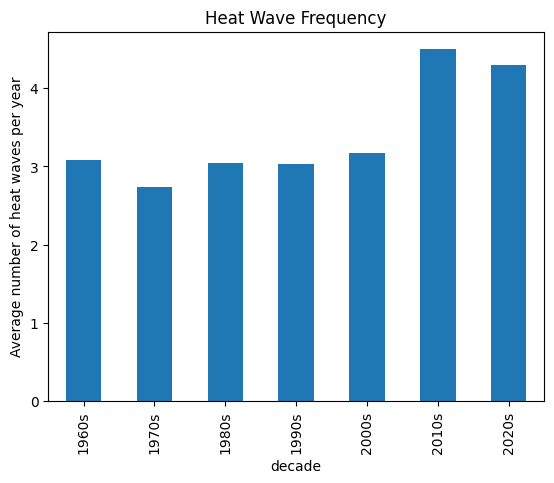

In [46]:
averages = heatwave_year.groupby('decade')['heatwave_count'].mean()
averages.plot(kind='bar')
plt.xlabel('decade')
plt.ylabel('Average number of heat waves per year')
plt.title('Heat Wave Frequency')
plt.show()

### Heatwave duration

In [47]:
heatwave_duration = pd.read_csv(r"/global/cfs/cdirs/m1532/Projects_MVP/geospatial/climate_heatwave/city_heatwave/city_heatwave/min_apparent_temp/city_heatwave_duration_1961_2021.csv").drop(columns={'Unnamed: 0'})
heatwave_duration

,year,city_name,AT_min,heatwave_duration
0,1961,Albuquerque,4,2
1,1961,Albuquerque,12,2
2,1961,Allentown,8,3
3,1961,Allentown,4,2
4,1961,Austin,2,2
...,...,...,...,...
6347,2021,Tampa,20,3
6348,2021,Tampa,12,2
6349,2021,Tampa,32,2
6350,2021,Tucson,4,5


In [48]:
city_numbers_Duration = printCityNumbers(heatwave_duration, years)
city_numbers_Duration

[{1961: 34},
 {1962: 22},
 {1963: 31},
 {1964: 31},
 {1965: 32},
 {1966: 33},
 {1967: 33},
 {1968: 36},
 {1969: 42},
 {1970: 37},
 {1971: 30},
 {1972: 43},
 {1973: 26},
 {1974: 22},
 {1975: 23},
 {1976: 16},
 {1977: 36},
 {1978: 31},
 {1979: 28},
 {1980: 41},
 {1981: 34},
 {1982: 25},
 {1983: 36},
 {1984: 26},
 {1985: 26},
 {1986: 28},
 {1987: 30},
 {1988: 37},
 {1989: 33},
 {1990: 30},
 {1991: 33},
 {1992: 23},
 {1993: 37},
 {1994: 33},
 {1995: 42},
 {1996: 38},
 {1997: 40},
 {1998: 43},
 {1999: 41},
 {2000: 27},
 {2001: 33},
 {2002: 35},
 {2003: 29},
 {2004: 24},
 {2005: 38},
 {2006: 47},
 {2007: 42},
 {2008: 39},
 {2009: 38},
 {2010: 47},
 {2011: 50},
 {2012: 47},
 {2013: 37},
 {2014: 31},
 {2015: 37},
 {2016: 45},
 {2017: 42},
 {2018: 41},
 {2019: 40},
 {2020: 41},
 {2021: 37}]

In [49]:
len(heatwave_duration['city_name'].unique())

50

In [50]:
heatwave_duration['decade'] = heatwave_duration['year'].apply(findDecade)
heatwave_duration

,year,city_name,AT_min,heatwave_duration,decade
0,1961,Albuquerque,4,2,1960s
1,1961,Albuquerque,12,2,1960s
2,1961,Allentown,8,3,1960s
3,1961,Allentown,4,2,1960s
4,1961,Austin,2,2,1960s
...,...,...,...,...,...
6347,2021,Tampa,20,3,2020s
6348,2021,Tampa,12,2,2020s
6349,2021,Tampa,32,2,2020s
6350,2021,Tucson,4,5,2020s


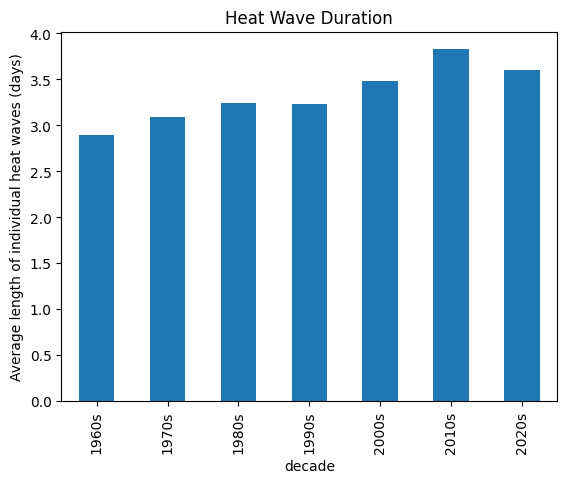

In [51]:
averages = heatwave_duration.groupby('decade')['heatwave_duration'].mean()
averages.plot(kind='bar')
plt.xlabel('decade')
plt.ylabel('Average length of individual heat waves (days)')
plt.title('Heat Wave Duration')
plt.show()

### Heatwave Season Length

In [52]:
heatwave_length = pd.read_csv(r"/global/cfs/cdirs/m1532/Projects_MVP/geospatial/climate_heatwave/city_heatwave/city_heatwave/min_apparent_temp/city_heatwave_season_length_1961_2021.csv", dtype = {'year': int}).drop(columns={'Unnamed: 0'})
heatwave_length

,year,city_name,heatwave_season_length
0,1961,Albuquerque,44
1,1961,Allentown,36
2,1961,Austin,2
3,1961,Birmingham,8
4,1961,Boston,56
...,...,...,...
2104,2021,Seattle,50
2105,2021,St. Louis,56
2106,2021,Tampa,138
2107,2021,Tucson,5


In [53]:
heatwave_2020 = heatwave_length[heatwave_length['year'] == 2020]
heatwave_2020

,year,city_name,heatwave_season_length
2031,2020,Albuquerque,43
2032,2020,Allentown,16
2033,2020,Atlanta,2
2034,2020,Austin,64
2035,2020,Baton Rouge,66
2036,2020,Birmingham,99
2037,2020,Boston,56
2038,2020,Buffalo,41
2039,2020,Charlotte,46
2040,2020,Cleveland,5


In [54]:
len(heatwave_length['city_name'].unique())

50

In [55]:
heatwave_length['decade'] = heatwave_duration['year'].apply(findDecade)
heatwave_length

,year,city_name,heatwave_season_length,decade
0,1961,Albuquerque,44,1960s
1,1961,Allentown,36,1960s
2,1961,Austin,2,1960s
3,1961,Birmingham,8,1960s
4,1961,Boston,56,1960s
...,...,...,...,...
2104,2021,Seattle,50,1980s
2105,2021,St. Louis,56,1980s
2106,2021,Tampa,138,1980s
2107,2021,Tucson,5,1980s


In [56]:
import warnings
warnings.filterwarnings('ignore')

In [57]:
heatwave_1960s = heatwave_length[(heatwave_length['year']>= 1961)&(heatwave_length['year']<= 1970)]
heatwave_1960s['decade'] = '1960s'
heatwave_1970s = heatwave_length[(heatwave_length['year']>= 1971)&(heatwave_length['year']<= 1980)]
heatwave_1970s['decade'] = '1970s'
heatwave_1980s = heatwave_length[(heatwave_length['year']>= 1981)&(heatwave_length['year']<= 1990)]
heatwave_1980s['decade'] = '1980s'
heatwave_1990s = heatwave_length[(heatwave_length['year']>= 1991)&(heatwave_length['year']<= 2000)]
heatwave_1990s['decade'] = '1990s'
heatwave_2000s = heatwave_length[(heatwave_length['year']>= 2001)&(heatwave_length['year']<= 2010)]
heatwave_2000s['decade'] = '2000s'
heatwave_2010s = heatwave_length[(heatwave_length['year']>= 2011)&(heatwave_length['year']<= 2020)]
heatwave_2010s['decade'] = '2010s'
heatwave_2020s = heatwave_length[heatwave_length['year'] >= 2021]
heatwave_2020s['decade'] = '2020s'

In [58]:
heatwave_length = pd.concat([heatwave_1960s, heatwave_1970s, heatwave_1980s, heatwave_1990s, heatwave_2000s, heatwave_2010s, heatwave_2020s])
heatwave_length

,year,city_name,heatwave_season_length,decade
0,1961,Albuquerque,44,1960s
1,1961,Allentown,36,1960s
2,1961,Austin,2,1960s
3,1961,Birmingham,8,1960s
4,1961,Boston,56,1960s
...,...,...,...,...
2104,2021,Seattle,50,2020s
2105,2021,St. Louis,56,2020s
2106,2021,Tampa,138,2020s
2107,2021,Tucson,5,2020s


In [59]:
heatwave_length['decade'].unique()

array(['1960s', '1970s', '1980s', '1990s', '2000s', '2010s', '2020s'],
      dtype=object)

In [60]:
heatwave_length['year'].unique()

array([1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021])

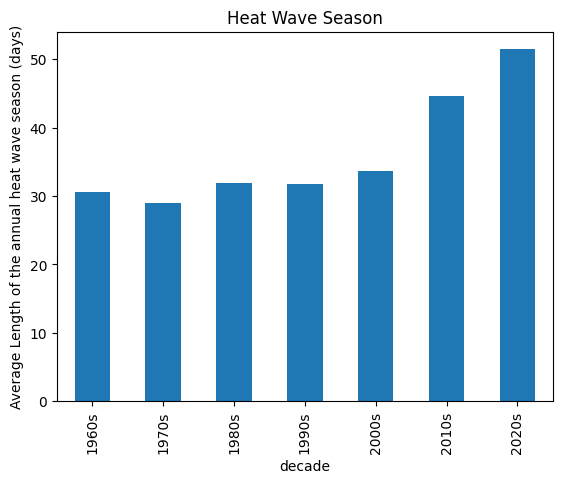

In [61]:
averages = heatwave_length.groupby('decade')['heatwave_season_length'].mean()
averages.plot(kind='bar')
plt.xlabel('decade')
plt.ylabel('Average Length of the annual heat wave season (days)')
plt.title('Heat Wave Season')
plt.show()

#### Heatwave Intensity

In [62]:
heatwave_intensity = pd.read_csv(r"/global/cfs/cdirs/m1532/Projects_MVP/geospatial/climate_heatwave/city_heatwave/city_heatwave/min_apparent_temp/city_heatwave_intensity_1961_2021.csv", dtype={'year': int}).drop(columns={'Unnamed: 0'})
heatwave_intensity

,year,city_name,heatwave_intensity
0,1961,Albuquerque,1.367459
1,1961,Albuquerque,2.495151
2,1961,Allentown,4.946765
3,1961,Allentown,2.053965
4,1961,Austin,2.693875
...,...,...,...
6347,2021,Tampa,2.422256
6348,2021,Tampa,2.422256
6349,2021,Tampa,2.422256
6350,2021,Tucson,2.770709


In [63]:
heatwave_intensity['decade'] = heatwave_intensity['year'].apply(findDecade)
heatwave_intensity

,year,city_name,heatwave_intensity,decade
0,1961,Albuquerque,1.367459,1960s
1,1961,Albuquerque,2.495151,1960s
2,1961,Allentown,4.946765,1960s
3,1961,Allentown,2.053965,1960s
4,1961,Austin,2.693875,1960s
...,...,...,...,...
6347,2021,Tampa,2.422256,2020s
6348,2021,Tampa,2.422256,2020s
6349,2021,Tampa,2.422256,2020s
6350,2021,Tucson,2.770709,2020s


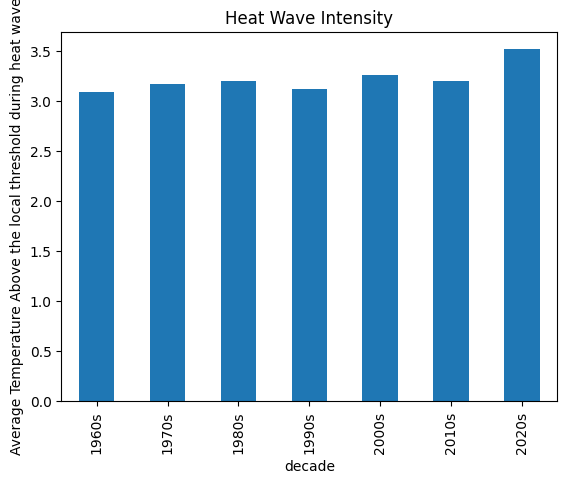

In [64]:
averages = heatwave_intensity.groupby('decade')['heatwave_intensity'].mean()
averages.plot(kind='bar')
plt.xlabel('decade')
plt.ylabel('Average Temperature Above the local threshold during heat wave(F)')
plt.title('Heat Wave Intensity')
plt.show()